In [1]:
import pyforest
pd.set_option( 'display.max_columns', 200)

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv("shootings.csv")

<IPython.core.display.Javascript object>

In [3]:
df.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [26]:
df.shape

(4895, 16)

In [4]:
df.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

In [5]:
df.isna().sum().sum()

0

In [22]:
df.head (2) #To display the first 2 rows

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015


In [21]:
df.tail(2) #To display the last 2 rows

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year
4893,5921,William Slyter,2020-06-13,shot,gun,22,M,White,Kansas City,MO,False,other,Other,False,Guns,2020
4894,5924,Nicholas Hirsh,2020-06-15,shot,gun,31,M,White,Lawrence,KS,False,attack,Car,False,Guns,2020


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [8]:
df['age'] = df['age'].astype(int)

In [9]:
df['date']=pd.to_datetime(df['date'])

<IPython.core.display.Javascript object>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       4895 non-null   int64         
 1   name                     4895 non-null   object        
 2   date                     4895 non-null   datetime64[ns]
 3   manner_of_death          4895 non-null   object        
 4   armed                    4895 non-null   object        
 5   age                      4895 non-null   int32         
 6   gender                   4895 non-null   object        
 7   race                     4895 non-null   object        
 8   city                     4895 non-null   object        
 9   state                    4895 non-null   object        
 10  signs_of_mental_illness  4895 non-null   bool          
 11  threat_level             4895 non-null   object        
 12  flee                     4895 non-

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

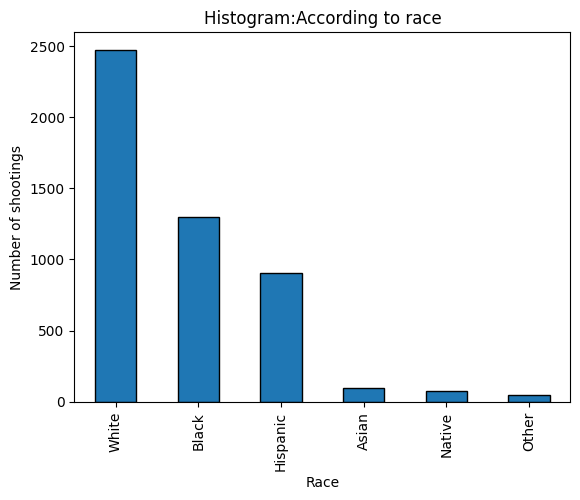

In [11]:
df['race'].value_counts().plot(kind='bar', edgecolor = 'black')
plt.title('Histogram:According to race')
plt.xlabel('Race')
plt.ylabel('Number of shootings')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

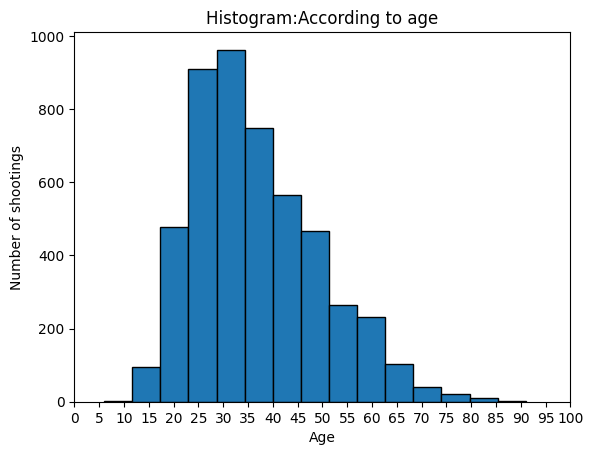

In [35]:
plt.hist(df['age'], bins=15, edgecolor = 'black') #Or df['age'].plot(kind = 'hist', bins = 15, edgecolor = 'black')
plt.title('Histogram:According to age')
plt.xlabel('Age')
plt.ylabel('Number of shootings')
plt.xticks( range ( 0, 101, 5))
plt.show()

In [13]:
df['year'] = df['date'].dt.year
year_shootings = df.groupby('year').size()
#count() can also be used instead of size()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

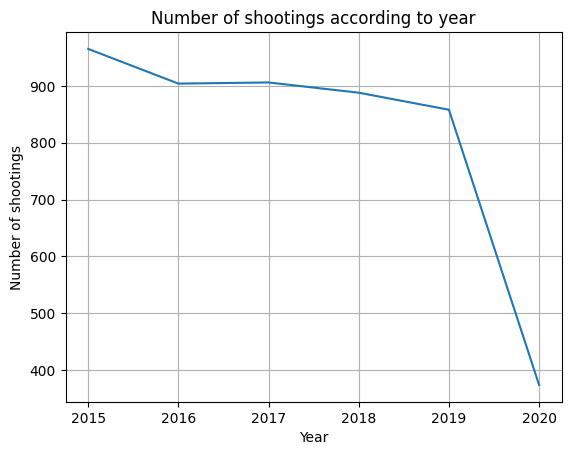

In [18]:
year_shootings.plot (kind='line', grid = 'black')
plt.title('Number of shootings according to year')
plt.xlabel('Year')
plt.ylabel('Number of shootings')
plt.show()

In [ ]:
df.groupby('year').size()

year
2015    965
2016    904
2017    906
2018    888
2019    858
2020    374
dtype: int64

In [ ]:
df.groupby(['year',df['date'].dt.month]).size()


year  date
2015  1       75
      2       77
      3       91
      4       83
      5       69
              ..
2020  2       61
      3       73
      4       58
      5       78
      6       22
Length: 66, dtype: int64

In [ ]:
df[df['year'] == 2020].groupby(['year', df['date'].dt.month]).size()

year  date
2020  1       82
      2       61
      3       73
      4       58
      5       78
      6       22
dtype: int64

In [ ]:
df[df['year'] == 2019].groupby(['year', df['date'].dt.month]).size()

year  date
2019  1        81
      2        68
      3        76
      4        63
      5        64
      6        77
      7        69
      8        57
      9        59
      10       73
      11       71
      12      100
dtype: int64

In [ ]:
df.groupby(df['age']) . size()

age
6      2
12     1
13     1
14     3
15    13
      ..
81     1
82     2
83     2
84     4
91     1
Length: 75, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Number of shootings')

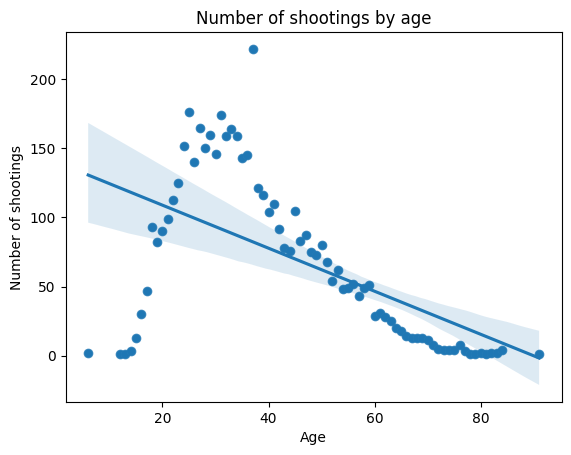

In [38]:
age_shootings = df.groupby(df['age']) . size()
sns.scatterplot(x=age_shootings.index, y=age_shootings.values)
sns.regplot(x=age_shootings.index, y=age_shootings.values)

plt.title('Number of shootings by age')
plt.xlabel('Age')
plt.ylabel('Number of shootings')


In [ ]:
df.groupby(['year', 'race']).size()

year  race    
2015  Asian        14
      Black       258
      Hispanic    172
      Native        9
      Other        15
      White       497
2016  Asian        15
      Black       234
      Hispanic    160
      Native       16
      Other        11
      White       468
2017  Asian        16
      Black       224
      Hispanic    179
      Native       22
      Other         6
      White       459
2018  Asian        21
      Black       229
      Hispanic    165
      Native       15
      Other         4
      White       454
2019  Asian        19
      Black       250
      Hispanic    163
      Native       13
      Other         9
      White       404
2020  Asian         8
      Black       103
      Hispanic     63
      Native        3
      Other         3
      White       194
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

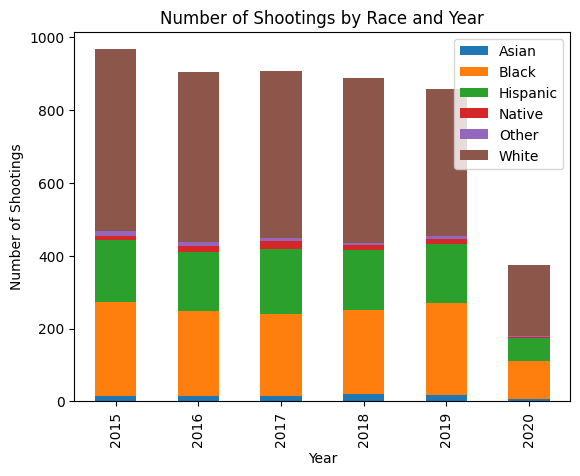

In [ ]:
shootings_by_race_year = df.groupby(['year', 'race']).size()
shootings_by_race_year = shootings_by_race_year.unstack()


shootings_by_race_year.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.title('Number of Shootings by Race and Year')
plt.legend(loc='upper right')
plt.show()

C:\Users\alfre\AppData\Local\Temp\ipykernel_21912\4275030552.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


<IPython.core.display.Javascript object>

C:\Users\alfre\AppData\Local\Temp\ipykernel_21912\4275030552.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

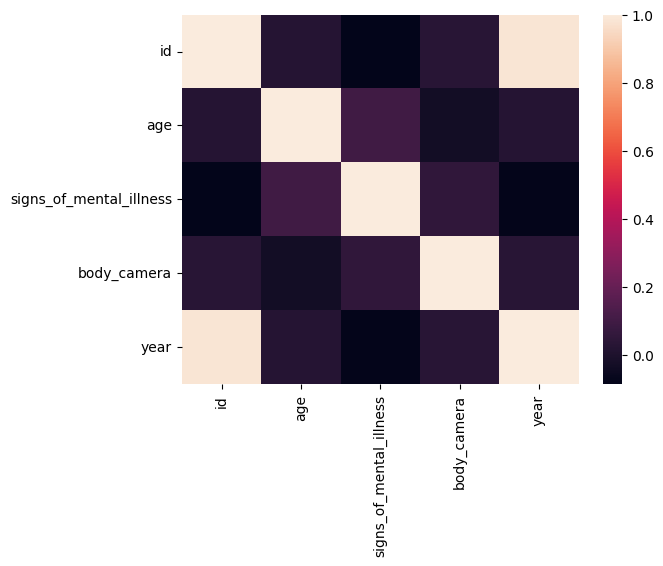

In [28]:
df.corr()
sns.heatmap(df.corr())


In [32]:
df.duplicated().sum()


0